<a href="https://colab.research.google.com/github/jangvu/Project_by_me/blob/main/time_series_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [111]:
raw_data = np.load('/content/data_train_candidate.npy')
test_data = np.load('/content/data_test_candidate.npy')

In [112]:
X_full, y_full = raw_data[:,:3], raw_data[:,3:]
X_test_full, y_test_full = test_data[:,:3], test_data[:,3:]

In [118]:
'''def getdata(data,windowsize,shift):
  X_data = []
  y_data = []
  for i in range(len(data) - windowsize - shift):
    X_data.append(data[i:i+ windowsize, :])
    y_data.append(data[i+windowsize:i+windowsize+shift])
  return X_data, y_data

In [119]:
'''X_train = getdata(X_full,10,1)
y_train = getdata(y_full,10,1)

In [ ]:
'''X_train[800]

In [ ]:
'''X_train.shape

In [85]:
X_data = []
y_data = []
data = X_full
X_test = []
y_test = []
windowsize = 10
shift = 1
for i in range(len(data) - windowsize - shift):
  X_data.append(X_full[i:i+ windowsize, :])
  y_data.append(y_full[i+windowsize: i+windowsize+shift, :])
  X_test.append(X_test_full[i:i+ windowsize, :])
  y_test.append(y_test_full[i+windowsize: i+windowsize+shift, :])


In [86]:
X_data = np.asarray(X_data)
y_data = np.asarray(y_data)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [87]:
print(X_data.shape)
print(y_data.shape)

(989, 10, 3)
(989, 1, 1)


In [95]:
n_input = 10
n_features = 3

model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10))
model.compile(optimizer='adam', loss='mse')

In [96]:
model.fit(X_data,y_data,epochs=200)

Epoch 1/200
31/31 [==============================] - 4s 17ms/step - loss: 2.7213e-06
Epoch 2/200
31/31 [==============================] - 1s 17ms/step - loss: 2.1977e-07
Epoch 3/200
31/31 [==============================] - 1s 17ms/step - loss: 1.1666e-07
Epoch 4/200
31/31 [==============================] - 1s 17ms/step - loss: 1.1888e-07
Epoch 5/200
31/31 [==============================] - 1s 17ms/step - loss: 1.1615e-07
Epoch 6/200
31/31 [==============================] - 1s 17ms/step - loss: 1.2145e-07
Epoch 7/200
31/31 [==============================] - 1s 17ms/step - loss: 1.2229e-07
Epoch 8/200
31/31 [==============================] - 1s 17ms/step - loss: 1.2724e-07
Epoch 9/200
31/31 [==============================] - 1s 17ms/step - loss: 1.3300e-07
Epoch 10/200
31/31 [==============================] - 1s 17ms/step - loss: 1.2170e-07
Epoch 11/200
31/31 [==============================] - 1s 17ms/step - loss: 1.4030e-07
Epoch 12/200
31/31 [==============================] - 1s 17ms/s

In [99]:
y_pred = model.predict(X_test)

In [107]:
#y_pred = y_pred.reshape(-1)
y_test = y_test.reshape(-1)
y_pred.shape
y_plot = []
for i in y_pred:
  y_plot.append(i[-1])


array([ 7.1644317e-06, -2.1213538e-04, -1.4487865e-04,  1.8843335e-04,
        3.5403398e-05, -1.8362669e-04, -2.9062030e-05, -2.3514795e-04,
       -1.1421159e-04,  2.0268037e-04], dtype=float32)

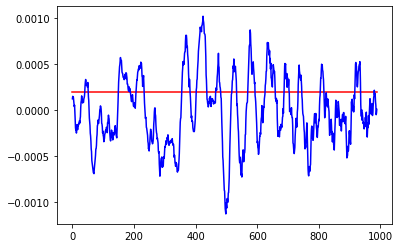

In [108]:
plt.plot(y_plot, color = 'red', label = 'prediction')
plt.plot(y_test, color = 'blue', label ='reality')
plt.show()

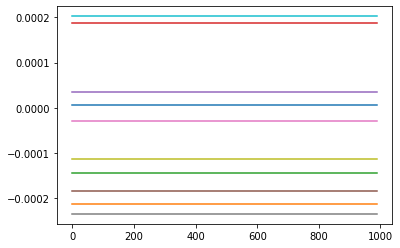

In [110]:
plt.plot(y_pred)
plt.show()